<a href="https://colab.research.google.com/github/MSajidAli-byte/Sajidbasicportfolio/blob/gh-pages/project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project for ML

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint


newsgroups_train = fetch_20newsgroups(subset='train')

pprint(list(newsgroups_train.target_names))
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# Random Forest

In [ ]:
# import sklearn.datasets.fetch_20newsgroups
# apply random forest on 20News dataset do all preprocessing too

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the 20 newsgroups dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Train a random forest classifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, newsgroups_train.target)

# Evaluate the classifier on the test set
y_pred = classifier.predict(X_test)

# Print the classification report
print(classification_report(newsgroups_test.target, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.65      0.68       319
           1       0.57      0.65      0.61       389
           2       0.65      0.77      0.70       394
           3       0.63      0.63      0.63       392
           4       0.73      0.79      0.76       385
           5       0.75      0.69      0.72       395
           6       0.72      0.90      0.80       390
           7       0.84      0.79      0.81       396
           8       0.90      0.90      0.90       398
           9       0.82      0.89      0.86       397
          10       0.89      0.94      0.91       399
          11       0.88      0.91      0.90       396
          12       0.70      0.51      0.59       393
          13       0.84      0.68      0.75       396
          14       0.82      0.87      0.84       394
          15       0.68      0.92      0.78       398
          16       0.67      0.88      0.76       364
          17       0.92    

# Project Start-20NewsGroup dataset

# CNN

Epoch 1/3
472/472 [==============================] - 197s 415ms/step - loss: 1.8767 - accuracy: 0.5045 - val_loss: 0.8627 - val_accuracy: 0.7679
Epoch 2/3
472/472 [==============================] - 192s 406ms/step - loss: 0.4814 - accuracy: 0.8772 - val_loss: 0.4604 - val_accuracy: 0.8671
Epoch 3/3
472/472 [==============================] - 191s 404ms/step - loss: 0.1580 - accuracy: 0.9672 - val_loss: 0.3830 - val_accuracy: 0.8878


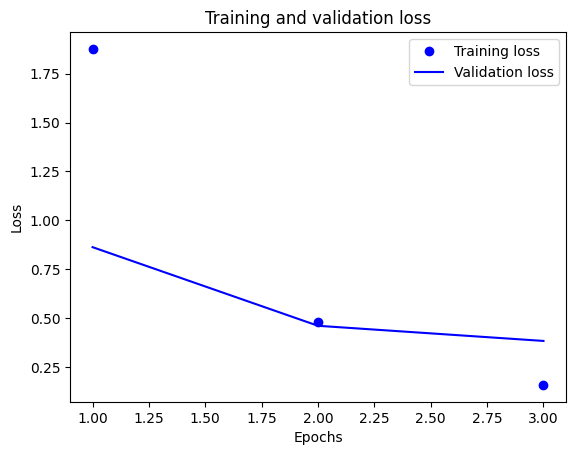

118/118 [==============================] - 12s 105ms/step - loss: 0.3830 - accuracy: 0.8878
Test score: 0.38300368189811707
Test accuracy: 0.8877984285354614


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical  # Updated import

# Fetch the dataset
newsgroups = fetch_20newsgroups(subset='all')
texts = newsgroups.data  # List of documents
labels = newsgroups.target  # Corresponding labels

# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure uniform length
data = pad_sequences(sequences, maxlen=1000)

# Convert labels to one-hot encoding
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels, num_classes=20)  # Updated method

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, categorical_labels, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=1000))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(20, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, batch_size=32, epochs=3, validation_data=(X_test, y_test))
# Extract the training and validation loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Create the plot
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
score, acc = model.evaluate(X_test, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)


# Step1: Class Representation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Create a DataFrame from the dataset
df = pd.DataFrame({'text': newsgroups.data, 'label': newsgroups.target})

# Map target labels to target names
df['label'] = df['label'].map(lambda x: newsgroups.target_names[x])

# Explore the dataset
print(df.head())
print(df['label'].value_counts())

                                                text                     label
0  \n\nI am sure some bashers of Pens fans are pr...          rec.sport.hockey
1  My brother is in the market for a high-perform...  comp.sys.ibm.pc.hardware
2  \n\n\n\n\tFinally you said what you dream abou...     talk.politics.mideast
3  \nThink!\n\nIt's the SCSI card doing the DMA t...  comp.sys.ibm.pc.hardware
4  1)    I have an old Jasmine drive which I cann...     comp.sys.mac.hardware
label
rec.sport.hockey            999
soc.religion.christian      997
rec.motorcycles             996
rec.sport.baseball          994
sci.crypt                   991
rec.autos                   990
sci.med                     990
comp.windows.x              988
sci.space                   987
comp.os.ms-windows.misc     985
sci.electronics             984
comp.sys.ibm.pc.hardware    982
misc.forsale                975
comp.graphics               973
comp.sys.mac.hardware       963
talk.politics.mideast       940
talk.pol

# Step 2: Visualization

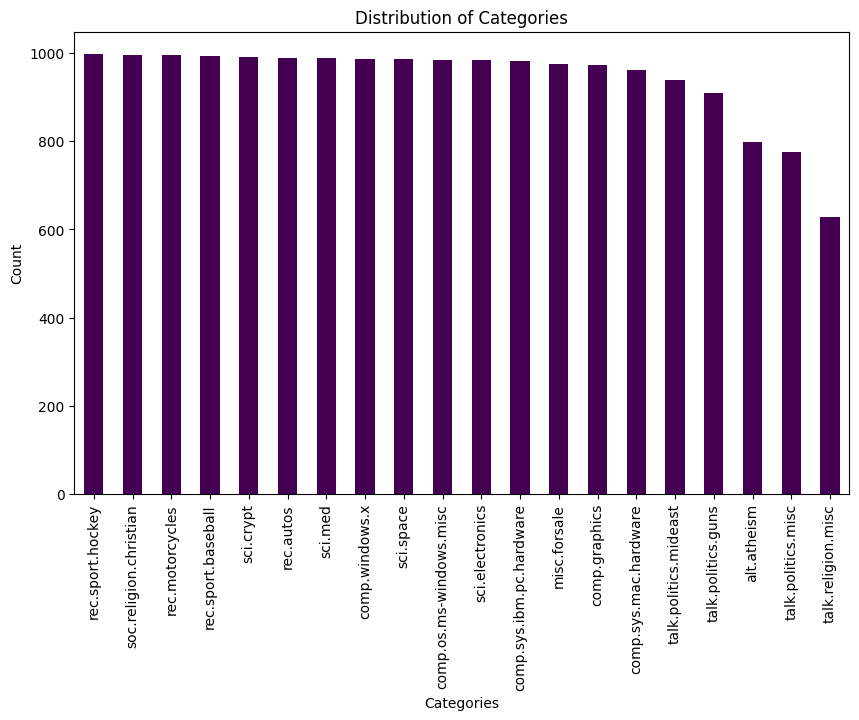

In [ ]:
# Visualize the distribution of categories
plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar', colormap='viridis')
plt.title('Distribution of Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

# ML Naive Bays and RandomForest on the 20News: MultinomialNB

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
from pprint import pprint

# Fetch the dataset
newsgroups_train = fetch_20newsgroups(subset='train')
pprint(list(newsgroups_train.target_names))

# Print the shape of the data
print(newsgroups_train.filenames.shape)
print(newsgroups_train.target.shape)

# Print the target array
print(newsgroups_train.target[:10])

# Fetch a subset of the dataset
cats = ['alt.atheism', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats)
print(list(newsgroups_train.target_names))

# Print the shape of the subset
print(newsgroups_train.filenames.shape)
print(newsgroups_train.target.shape)

# Print the target array of the subset
print(newsgroups_train.target[:10])

# Vectorize the text data
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
print(vectors.shape)
print(vectors.nnz / float(vectors.shape[0]))

# Train a Naive Bayes classifier
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
vectors_test = vectorizer.transform(newsgroups_test.data)
clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target)
pred = clf.predict(vectors_test)
print(metrics.f1_score(newsgroups_test.target, pred, average='macro'))

# Train a Random Forest classifier
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
classifier = RandomForestClassifier()
classifier.fit(vectors, newsgroups_train.target)

# Define a function to show top 10 features for each category
def show_top10(classifier, vectorizer, categories):
    feature_names = np.asarray(vectorizer.get_feature_names_out())
    for i, category in enumerate(categories):
        top10 = np.argsort(classifier.feature_importances_[i])[-10:]
        print("%s: %s" % (category, " ".join(feature_names[top10])))

# Call the function
show_top10(classifier, vectorizer, newsgroups_train.target_names)

# Test the classifier with data that has headers, footers, and quotes removed
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=categories)
vectors_test = vectorizer.transform(newsgroups_test.data)
pred = clf.predict(vectors_test)
print(metrics.f1_score(pred, newsgroups_test.target, average='macro'))

# Retrain with data that has headers, footers, and quotes removed
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=categories)
vectors = vectorizer.fit_transform(newsgroups_train.data)
clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target)
vectors_test = vectorizer.transform(newsgroups_test.data)
pred = clf.predict(vectors_test)
print(metrics.f1_score(newsgroups_test.target, pred, average='macro'))


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
(11314,)
(11314,)
[ 7  4  4  1 14 16 13  3  2  4]
['alt.atheism', 'sci.space']
(1073,)
(1073,)
[0 1 1 1 0 1 1 0 0 0]
(2034, 34118)
159.0132743362832
0.8821359240272957
alt.atheism: 00
comp.graphics: 00
sci.space: 00
talk.religion.misc: 00
0.7731035068127478
0.7699517518452172


# classification_report for ML-NB

In [ ]:
from sklearn.metrics import classification_report



# Retrain with data that has headers, footers, and quotes removed
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=categories)
vectors = vectorizer.fit_transform(newsgroups_train.data)
clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target)
vectors_test = vectorizer.transform(newsgroups_test.data)
pred = clf.predict(vectors_test)

# Print the F1 score
print('F1 Score:', metrics.f1_score(newsgroups_test.target, pred, average='macro'))

# Print the classification report
report = classification_report(newsgroups_test.target, pred, target_names=newsgroups_test.target_names)
print(report)


F1 Score: 0.7699517518452172
                    precision    recall  f1-score   support

       alt.atheism       0.68      0.68      0.68       319
     comp.graphics       0.92      0.89      0.91       389
         sci.space       0.81      0.90      0.85       394
talk.religion.misc       0.68      0.60      0.64       251

          accuracy                           0.79      1353
         macro avg       0.77      0.77      0.77      1353
      weighted avg       0.79      0.79      0.79      1353



# ML-NB Heat Map Visualization

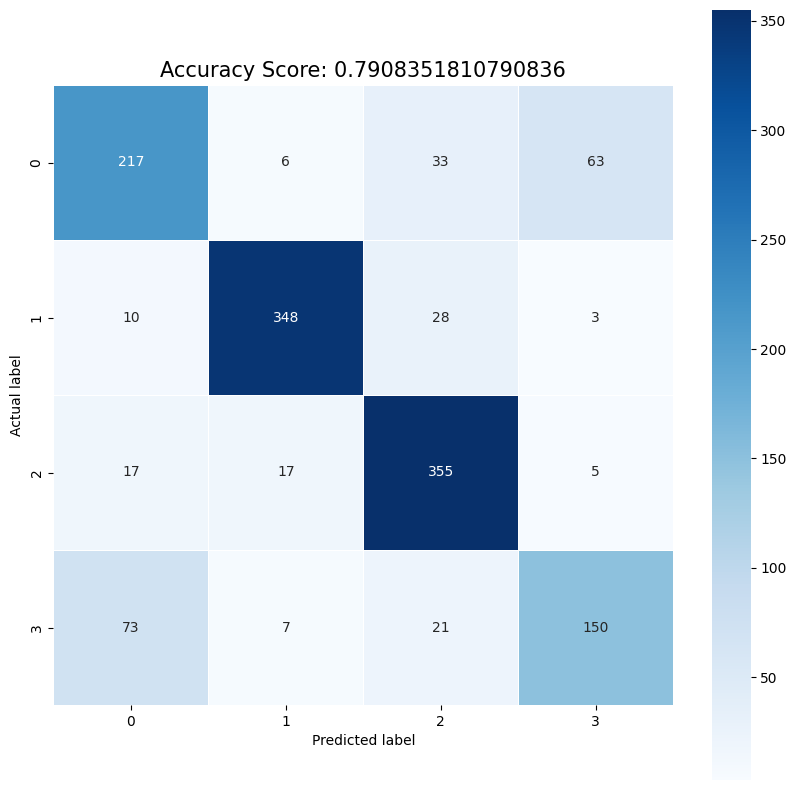

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming 'newsgroups_test.target' are the true labels and 'pred' are the predicted labels
cm = confusion_matrix(newsgroups_test.target, pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(np.mean(pred == newsgroups_test.target))
plt.title(all_sample_title, size = 15)
plt.show()


# Redundant

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn import metrics
import numpy as np

# Fetch the dataset
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)

# Train the Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(vectors, newsgroups_train.target)

# Define a function to show top 10 features for each category
def show_top10(classifier, vectorizer, categories):
    feature_names = np.asarray(vectorizer.get_feature_names_out())
    for i, category in enumerate(categories):
        top10 = np.argsort(classifier.feature_importances_[i])[-10:]
        print(f"{category}: {' '.join(feature_names[top10])}")

# Call the function to show top features
show_top10(classifier, vectorizer, newsgroups_train.target_names)


alt.atheism: 00
comp.graphics: 00
sci.space: 00
talk.religion.misc: 00


In [ ]:

# Test the Random Forest classifier with data that has headers, footers, and quotes removed
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=categories)
vectors_test = vectorizer.transform(newsgroups_test.data)
pred_rf = classifier.predict(vectors_test)  # Predict using Random Forest
print(metrics.f1_score(newsgroups_test.target, pred_rf, average='macro'))  # Print F1 score for Random Forest


0.5350270075575616


# Feature Reduction: PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


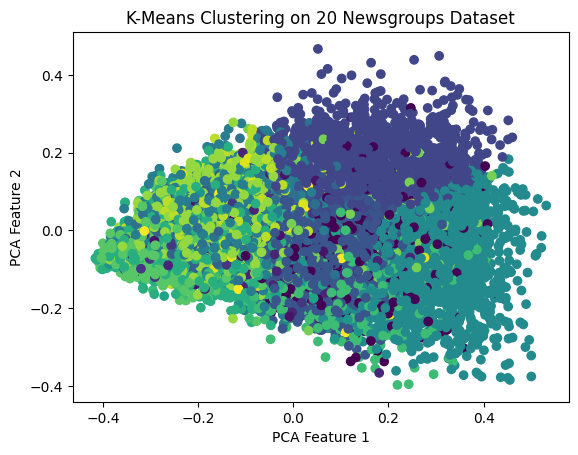

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the categories
categories = [
 'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'
]

# Fetch the dataset with only the specified categories
newsgroups = fetch_20newsgroups(subset='all', categories=categories)
# Fetch the dataset
# newsgroups = fetch_20newsgroups(subset='all')

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(newsgroups.data)

# Define the K-means model
kmeans = KMeans(n_clusters=20, random_state=42)

# Fit the model
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Cluster centers
centers = kmeans.cluster_centers_

# Reduce the dimensionality for visualization
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(X.toarray())

# Scatter plot of the data points
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering on 20 Newsgroups Dataset')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

# Since we don't have true labels for the 20 Newsgroups dataset, we can't plot them for comparison as in the Iris dataset.


# Applying MLP

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Fetch the dataset
newsgroups = fetch_20newsgroups(subset='all')

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=100, random_state=42)

# Fit the model
mlp.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = mlp.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


                          precision    recall  f1-score   support

             alt.atheism       0.63      0.64      0.63       151
           comp.graphics       0.53      0.54      0.54       202
 comp.os.ms-windows.misc       0.65      0.71      0.68       195
comp.sys.ibm.pc.hardware       0.50      0.46      0.48       183
   comp.sys.mac.hardware       0.68      0.60      0.63       205
          comp.windows.x       0.67      0.71      0.69       215
            misc.forsale       0.65      0.63      0.64       193
               rec.autos       0.66      0.67      0.67       196
         rec.motorcycles       0.72      0.79      0.75       168
      rec.sport.baseball       0.72      0.70      0.71       211
        rec.sport.hockey       0.77      0.71      0.73       198
               sci.crypt       0.85      0.79      0.82       201
         sci.electronics       0.50      0.49      0.49       202
                 sci.med       0.59      0.65      0.62       194
         

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
